In [181]:
#import sweetviz as sv
import pandas as pd
#import dtale
import numpy as np
from sdmetrics.reports.multi_table import QualityReport
%matplotlib inline


import os
import json

#from pandas.io.json import json_normalize
from datetime import datetime 
from tqdm import tqdm
from sklearn.preprocessing import PowerTransformer
#import umap.umap_ as umap
#import umap.plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats

from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

from functions import condense_category#,cluster_profile

#from lightgbm import LGBMClassifier
#import shap
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [182]:

df_Akse5koder = pd.read_csv("../../data/external/PHBUAkse5.csv",sep='\t' )
df_Akse5koder.head(5)

,KodeID,Niva0ID,Niva1ID
0,5000,5000,5000
1,5999,5999,5999
2,1.0,Z62,Z55-Z65
3,1,Z62,Z55-Z65
4,1.1,Z63,Z55-Z65


In [183]:

df_icd10Kapittel = pd.read_csv("../../data/external/ICD10Kapittel.csv",sep='\t' 
 )
df_icd10Kapittel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21956 entries, 0 to 21955
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KodeID       21956 non-null  object 
 1   KodeNavn     21955 non-null  object 
 2   Tekst        21955 non-null  object 
 3   Niva0ID      21956 non-null  object 
 4   Niva0Navn    21956 non-null  object 
 5   Niva0SortID  397 non-null    float64
 6   Niva1ID      21933 non-null  object 
 7   Niva1Navn    21933 non-null  object 
 8   Niva2ID      21683 non-null  object 
 9   Niva2Navn    21683 non-null  object 
 10  Niva3ID      21678 non-null  object 
 11  Niva3Navn    21677 non-null  object 
 12  Niva4ID      21660 non-null  object 
 13  Niva4Navn    21660 non-null  object 
 14  MNiva        21944 non-null  float64
 15  LasteSeq     390 non-null    float64
dtypes: float64(3), object(13)
memory usage: 2.7+ MB


In [184]:
episode_cat =[  'ReshID_Avdeling'
, 'ReshID_Seksjon'  

, 'polUtforende'
  #    ,'spesialist'
      ,'rolle'

,'kontaktType'            

# Akse 1
, 'tilst1akse1'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse1'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse1'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse1'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse1'
#, 'tilst5akse1_kodeverk'

, 'tilst6akse1'

    
# Akse 2
, 'tilst1akse2'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse2'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse2'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse2'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse2'
#, 'tilst5akse1_kodeverk'

, 'tilst6akse2'
    
    
# Akse 3
, 'tilst1akse3'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse3'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse3'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse3'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse3'
#, 'tilst5akse1_kodeverk'

, 'tilst6akse3'
    
    
# Akse 4
, 'tilst1akse4'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse4'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse4'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse4'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse4'
#, 'tilst5akse1_kodeverk'
, 'tilst6akse4'
    
    
# Akse 5
, 'tilst1akse5'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse5'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse5'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse5'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse5'
#, 'tilst5akse1_kodeverk'
, 'tilst6akse5'
    
    
# Akse 6
, 'tilst1akse6'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse6'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse6'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse6'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse6'
#, 'tilst5akse1_kodeverk'
, 'tilst6akse6'             
            
]
episode_col =[  
    'episode_order'
            
,'episodeID' 
 ,'henvisningsperiodeID'
              

, 'ReshID_Avdeling'
, 'ReshID_Seksjon'  


,'innDatoTid'
,'utDatoTid'
,'kontaktType'            
, 'polUtforende'
     ,'spesialist'
      ,'rolle'

# Akse 1
, 'tilst1akse1'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse1'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse1'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse1'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse1'
#, 'tilst5akse1_kodeverk'

, 'tilst6akse1'

    
# Akse 2
, 'tilst1akse2'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse2'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse2'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse2'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse2'
#, 'tilst5akse1_kodeverk'

, 'tilst6akse2'
    
    
# Akse 3
, 'tilst1akse3'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse3'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse3'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse3'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse3'
#, 'tilst5akse1_kodeverk'

, 'tilst6akse3'
    
    
# Akse 4
, 'tilst1akse4'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse4'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse4'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse4'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse4'
#, 'tilst5akse1_kodeverk'
, 'tilst6akse4'
    
    
# Akse 5
, 'tilst1akse5'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse5'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse5'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse5'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse5'
#, 'tilst5akse1_kodeverk'
, 'tilst6akse5'
    
    
# Akse 6
, 'tilst1akse6'
#, 'tilst1akse1_kodeverk'
, 'tilst2akse6'
#, 'tilst2akse1_kodeverk'
, 'tilst3akse6'
#, 'tilst3akse1_kodeverk'
, 'tilst4akse6'
#, 'tilst4akse1_kodeverk'
, 'tilst5akse6'
#, 'tilst5akse1_kodeverk'
, 'tilst6akse6'

]

df_episode = pd.read_csv("../../data/raw/episode.csv",sep='\t'  ,low_memory=False
                    ,parse_dates=['innDatoTid','utDatoTid'],
  dtype=
                 
                 { 'episode_order':'int'
, 'episodeid' : 'int'        
, 'henvisningsperiodeID': 'int'
            


  
                     


                 },usecols =episode_col
                  )
df_episode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   episode_order         73134 non-null  int64         
 1   henvisningsperiodeID  73134 non-null  int64         
 2   episodeID             73134 non-null  int64         
 3   innDatoTid            73134 non-null  datetime64[ns]
 4   utDatoTid             73134 non-null  datetime64[ns]
 5   ReshID_Avdeling       73134 non-null  int64         
 6   ReshID_Seksjon        73134 non-null  int64         
 7   kontaktType           73134 non-null  int64         
 8   polUtforende          73134 non-null  int64         
 9   spesialist            73134 non-null  int64         
 10  rolle                 73134 non-null  int64         
 11  tilst1akse1           72589 non-null  object        
 12  tilst2akse1           26325 non-null  object        
 13  tilst3akse1     

In [185]:

henv_col =['henvisningsperiodeID'  ,'pasientNr'
          ,'ansienDato','sluttDato'
               
#, 'henvFraInstitusjonID'
          ]


df_henvisningsperiode = pd.read_csv("../../data/raw/henvisningsperiode.csv",sep='\t' ,parse_dates=['ansienDato','sluttDato'],
  dtype=
                 
                 {'henv_order':'int'
   
 ,'henvisningsperiodeID': 'int'
 ,'alder'  : 'int'                 
    ,'kjonn'  : 'object'                  

                 },usecols =henv_col)
df_henvisningsperiode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pasientNr             7730 non-null   int64         
 1   henvisningsperiodeID  7730 non-null   int64         
 2   sluttDato             7730 non-null   datetime64[ns]
 3   ansienDato            7730 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 241.7 KB


In [186]:

pas_col =['pasientNr','alder','kjonn'
          ]


df_pasient = pd.read_csv("../../data/raw/pasient.csv",sep='\t',dtype=
                 
                 {'pasientNr':'int'
   
 
 ,'alder'  : 'int'                 
    ,'kjonn'  : 'object'                  

                 },usecols =pas_col)
df_pasient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924 entries, 0 to 6923
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pasientNr  6924 non-null   int64 
 1   alder      6924 non-null   int64 
 2   kjonn      6924 non-null   object
dtypes: int64(2), object(1)
memory usage: 162.4+ KB


In [187]:
ids = df_pasient["pasientNr"]
df_pasient[ids.isin(ids[ids.duplicated()])].sort_values("pasientNr")

,pasientNr,alder,kjonn


## Prepare data 

In [188]:
df_episode_t =df_episode.copy()
df_henvisningsperiode_t = df_henvisningsperiode.copy()
df_pasient_t = df_pasient.copy()


### Filtrer ut henvisninger uten episoder

In [189]:
#henvlist = df_henvisningsperiode_exp['henvisningsperiodeID'].unique().tolist()
episoder_henvlist= df_episode_t['henvisningsperiodeID'].unique().tolist()
#df_episode_exp = df_episode_exp[df_episode_exp['henvisningsperiodeID'].isin(henvlist)]
df_henvisningsperiode_t = df_henvisningsperiode_t[df_henvisningsperiode_t['henvisningsperiodeID'].isin(episoder_henvlist)]

#henv_uten_episoder= list(set(henvlist) - set(episoder_henvlist))
#df_henvisningsperiode_exp = df_henvisningsperiode_exp[~df_henvisningsperiode_exp['henvisningsperiodeID'].isin(henv_uten_episoder)]
#df_episode_exp = df_episode_exp[~df_episode_exp['henvisningsperiodeID'].isin(henv_uten_episoder)]

In [190]:
#### finally filter episode with henvisningsperiodIDs not in henvisningsperiode
henvlist = df_henvisningsperiode_t['henvisningsperiodeID'].unique().tolist()
df_episode_t = df_episode_t[df_episode_t['henvisningsperiodeID'].isin(henvlist)]

In [191]:
print(len(df_episode_t['henvisningsperiodeID'].unique()))
print(len(df_henvisningsperiode_t['henvisningsperiodeID'].unique()))
print(len(df_pasient_t['pasientNr'].unique()))
print(len(df_henvisningsperiode_t['pasientNr'].unique()))

7730
7730
6924
6924


In [192]:
df_henvisningsperiode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   pasientNr             7730 non-null   int64         
 1   henvisningsperiodeID  7730 non-null   int64         
 2   sluttDato             7730 non-null   datetime64[ns]
 3   ansienDato            7730 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 241.7 KB


### Fill NA

In [193]:
#df_henvisningsperiode_t = df_henvisningsperiode_t.drop(columns=['alder','kjonn'], axis=1)
#df_henvisningsperiode_t.info()

In [194]:
from sklearn.impute import SimpleImputer
import numpy as np
# Setting the random_state argument for reproducibility

imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='missing')
#imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
#imputer = imp_constant(random_state=42)
imputer = imp_constant.fit(df_episode_t[episode_cat])
df_episode_t[episode_cat] = imputer.transform(pd.DataFrame(df_episode_t, columns=episode_cat))

#imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
#imputer = imp_constant(random_state=42)

#imputer = imp_constant.fit(data[['tilst1akse1']])
#henvisningsperiode_transformed[['tilst1akse1']] = imputer.transform(pd.DataFrame(henvisningsperiode_transformed, columns=['tilst1akse1']))
 

In [195]:
df_episode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   episode_order         73134 non-null  int64         
 1   henvisningsperiodeID  73134 non-null  int64         
 2   episodeID             73134 non-null  int64         
 3   innDatoTid            73134 non-null  datetime64[ns]
 4   utDatoTid             73134 non-null  datetime64[ns]
 5   ReshID_Avdeling       73134 non-null  object        
 6   ReshID_Seksjon        73134 non-null  object        
 7   kontaktType           73134 non-null  object        
 8   polUtforende          73134 non-null  object        
 9   spesialist            73134 non-null  int64         
 10  rolle                 73134 non-null  object        
 11  tilst1akse1           73134 non-null  object        
 12  tilst2akse1           73134 non-null  object        
 13  tilst3akse1     

# Transform 


In [196]:
df_henvisningsperiode_t['henvisnigsperiode_varighet'] = ((df_henvisningsperiode['sluttDato'] - df_henvisningsperiode['ansienDato']) / np.timedelta64(1, 'D')).astype(int)

In [197]:
episode_groupby= df_episode_t.groupby('henvisningsperiodeID', as_index=False)['episodeID'].count()

In [198]:
episode_groupby.head()

,henvisningsperiodeID,episodeID
0,7386305,3
1,7386308,1
2,7386309,1
3,7386314,1
4,7386316,1


In [199]:
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, episode_groupby, on=['henvisningsperiodeID'])

In [200]:
df_henvisningsperiode_t.rename(columns = {'episodeID':'antall_kontakter'}, inplace = True)
df_henvisningsperiode_t.head()

,pasientNr,henvisningsperiodeID,sluttDato,ansienDato,henvisnigsperiode_varighet,antall_kontakter
0,1001395,7386305,2016-06-07,2011-11-17,1664,3
1,1623992,7386308,2015-06-24,2011-11-25,1307,1
2,1582152,7386309,2018-01-04,2011-11-30,2227,1
3,1350364,7386314,2017-06-20,2011-12-08,2021,1
4,1791950,7386316,2015-01-28,2011-12-12,1143,1


### Legg til median kontakt lengde 

In [201]:
df_episode_t['episode_varighet'] = ((df_episode['utDatoTid'] - df_episode['innDatoTid']) / np.timedelta64(1, 'm')).astype(int)

<Axes: ylabel='Frequency'>

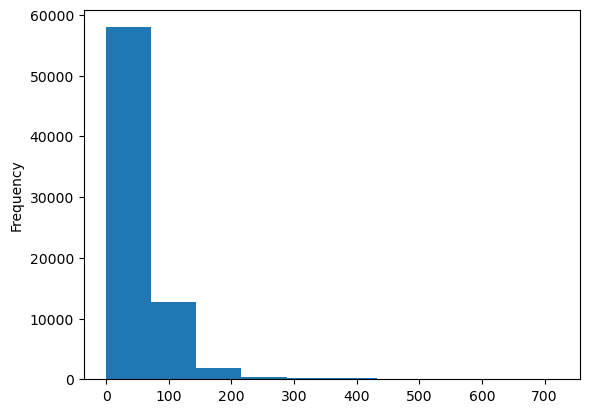

In [202]:
df_episode_t['episode_varighet'].plot(kind='hist')

In [203]:
df =df_episode_t.groupby(['henvisningsperiodeID']).agg({
#'kontaktTypeGrp_Direkte_pasientkontakt':'sum'
#,'kontaktTypeGrp_Indirekte_pasientkontakt':'sum'
'episode_varighet':'median'
              
                                         
                                         
                                         })
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left', left_on=['henvisningsperiodeID'], right_on=['henvisningsperiodeID'])
df_henvisningsperiode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   pasientNr                   7730 non-null   int64         
 1   henvisningsperiodeID        7730 non-null   int64         
 2   sluttDato                   7730 non-null   datetime64[ns]
 3   ansienDato                  7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   episode_varighet            7730 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4)
memory usage: 422.9 KB


In [204]:
df_henvisningsperiode_t.head()

,pasientNr,henvisningsperiodeID,sluttDato,ansienDato,henvisnigsperiode_varighet,antall_kontakter,episode_varighet
0,1001395,7386305,2016-06-07,2011-11-17,1664,3,20.0
1,1623992,7386308,2015-06-24,2011-11-25,1307,1,30.0
2,1582152,7386309,2018-01-04,2011-11-30,2227,1,60.0
3,1350364,7386314,2017-06-20,2011-12-08,2021,1,90.0
4,1791950,7386316,2015-01-28,2011-12-12,1143,1,20.0


In [205]:
df_henvisningsperiode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   pasientNr                   7730 non-null   int64         
 1   henvisningsperiodeID        7730 non-null   int64         
 2   sluttDato                   7730 non-null   datetime64[ns]
 3   ansienDato                  7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   episode_varighet            7730 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4)
memory usage: 422.9 KB


### Legg til    kontaktType polUtforende   spesialist   rolle 

In [206]:
df_episode_t.info()
#df_episode_t["rolleGrp"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   episode_order         73134 non-null  int64         
 1   henvisningsperiodeID  73134 non-null  int64         
 2   episodeID             73134 non-null  int64         
 3   innDatoTid            73134 non-null  datetime64[ns]
 4   utDatoTid             73134 non-null  datetime64[ns]
 5   ReshID_Avdeling       73134 non-null  object        
 6   ReshID_Seksjon        73134 non-null  object        
 7   kontaktType           73134 non-null  object        
 8   polUtforende          73134 non-null  object        
 9   spesialist            73134 non-null  int64         
 10  rolle                 73134 non-null  object        
 11  tilst1akse1           73134 non-null  object        
 12  tilst2akse1           73134 non-null  object        
 13  tilst3akse1     

<Axes: ylabel='spesialist'>

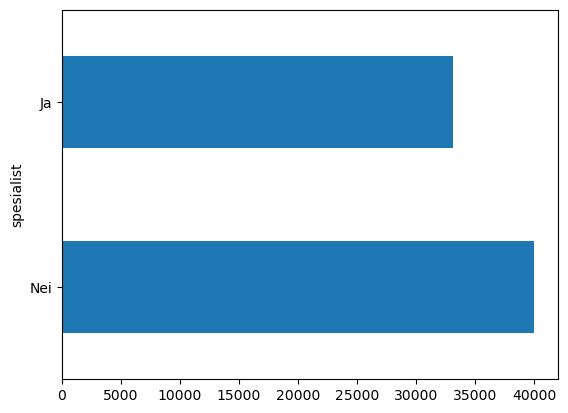

In [207]:
df_episode_t["spesialist"] = df_episode_t.rolle.map({1:'Ja',2:'Nei',9:'Ukjent'})
df_episode_t["spesialist"].value_counts().plot(kind='barh')

<Axes: ylabel='rolleGrp'>

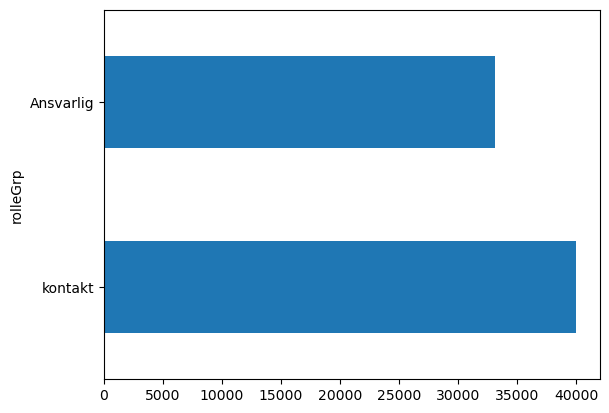

In [208]:
df_episode_t["rolleGrp"] = df_episode_t.rolle.map({1:'Ansvarlig',2:'kontakt'})
df_episode_t["rolleGrp"].value_counts().plot(kind='barh')

<Axes: ylabel='polUtforende'>

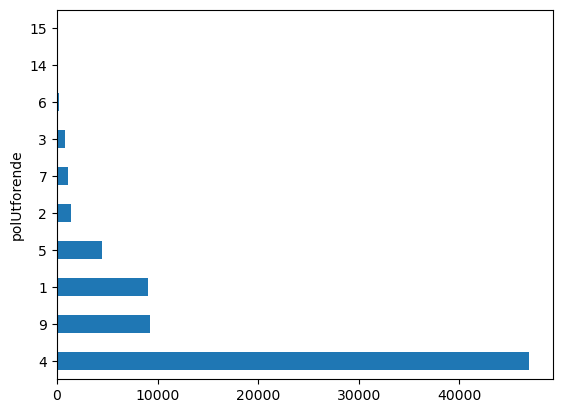

In [209]:
df_episode_t.polUtforende.value_counts().plot(kind='barh')

<Axes: ylabel='polUtforendeGrp'>

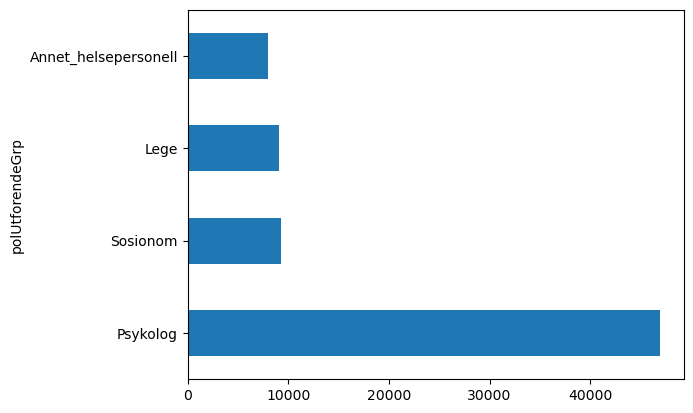

In [210]:
df_episode_t.polUtforende.value_counts().plot(kind='barh')
df_episode_t['polUtforendeGrp'] =df_episode_t.polUtforende
#df_episode_t['polUtforendeGrp'] = df_episode_t[['polUtforende']] .apply(condense_category,min_freq=0.0001, axis=0)
df_episode_t["polUtforendeGrp"] = df_episode_t.polUtforendeGrp.map({4:'Psykolog',1:'Lege',5:'Annet_helsepersonell',9:'Sosionom', 
                                                                    2:'Annet_helsepersonell',7:'Annet_helsepersonell',
                                                                    3:'Annet_helsepersonell',6:'Annet_helsepersonell',
                                                                    14:'Annet_helsepersonell',15:'Annet_helsepersonell'} #Ernæringfysiolog/fysioterpeut
                                                                    )
df_episode_t.polUtforendeGrp.value_counts().plot(kind='barh')

/home/ihelse.net/adm_mounir/source/repos/dsc_hvikt_synthdata/notebooks/exploratory/functions.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  series = pd.value_counts(col)


<Axes: ylabel='kontaktTypeGrp'>

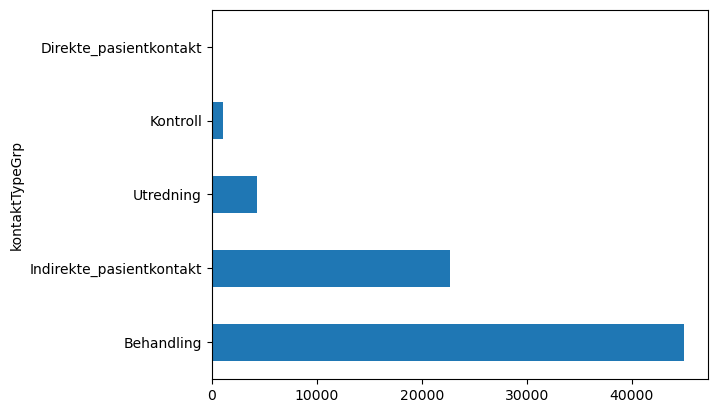

In [211]:

df_episode_t['kontaktTypeGrp'] = df_episode_t[['kontaktType']] .apply(condense_category,min_freq=0.01, axis=0)


df_episode_t["kontaktTypeGrp"] = df_episode_t.kontaktTypeGrp.map({1:'Utredning',2:'Behandling',5:'Indirekte_pasientkontakt',3:'Kontroll', 'andre':'Direkte_pasientkontakt'})
df_episode_t.kontaktTypeGrp.value_counts().plot(kind='barh')


In [212]:

#df_episode_t['ReshID_SeksjonGrp'] = df_episode_t[['ReshID_Seksjon']] .apply(condense_category,min_freq=0.01, axis=0)


#df_episode_t["kontaktTypeGrp"] = df_episode_t.kontaktTypeGrp.map({'1':'Direkte_pasientkontakt','2':'Direkte_pasientkontakt','5':'Indirekte_pasientkontakt', 'andre':'Direkte_pasientkontakt'})
#df_episode_t.ReshID_SeksjonGrp.value_counts().plot(kind='barh')

### JOIN episoder to ICD10 kapittel

In [213]:
#m= {"F30-F39":"F30-F48","1000":"1000","F30-F39":"F30-F48","1999":"1999","F40-F48":"F30-F48","Z00-Z13":"Z00-R46","F90-F98":"F90-F98","R40-R46":"Z00-R46","andre":"andre","missing":"missing"}

/home/ihelse.net/adm_mounir/source/repos/dsc_hvikt_synthdata/notebooks/exploratory/functions.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  series = pd.value_counts(col)


<Axes: ylabel='tilst1akse1Grp'>

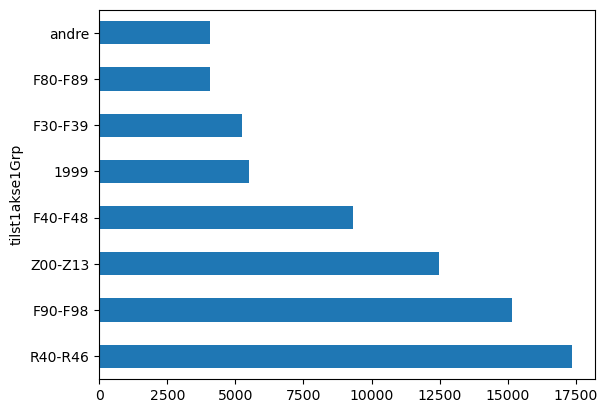

In [214]:
df = pd.merge(df_episode_t, df_icd10Kapittel, how='left', left_on=['tilst1akse1'], right_on=['KodeID'])
df['tilst1akse1Grp'] =  np.where(df['Niva1ID'].isnull(), df['tilst1akse1'], df['Niva1ID']) 
df_episode_t['tilst1akse1Grp']  = df[['tilst1akse1Grp']].apply(condense_category,min_freq=0.05, new_name="andre",axis=0)
df_episode_t.tilst1akse1Grp.value_counts().plot(kind='barh')

In [215]:
df_episode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   episode_order         73134 non-null  int64         
 1   henvisningsperiodeID  73134 non-null  int64         
 2   episodeID             73134 non-null  int64         
 3   innDatoTid            73134 non-null  datetime64[ns]
 4   utDatoTid             73134 non-null  datetime64[ns]
 5   ReshID_Avdeling       73134 non-null  object        
 6   ReshID_Seksjon        73134 non-null  object        
 7   kontaktType           73134 non-null  object        
 8   polUtforende          73134 non-null  object        
 9   spesialist            73134 non-null  object        
 10  rolle                 73134 non-null  object        
 11  tilst1akse1           73134 non-null  object        
 12  tilst2akse1           73134 non-null  object        
 13  tilst3akse1     

In [216]:
#df_episode_t["tilst1akse1Grp"] = df_episode_t.tilst1akse1Grp.map(m)
#df_episode_t.tilst1akse1Grp.value_counts().plot(kind='barh')

<Axes: ylabel='tilst1akse2Grp'>

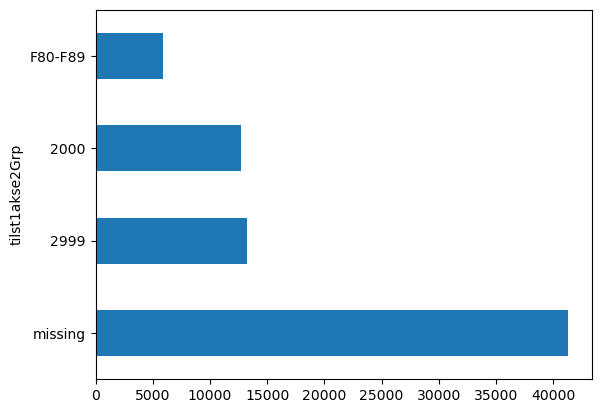

In [217]:
df = pd.merge(df_episode_t, df_icd10Kapittel, how='left', left_on=['tilst1akse2'], right_on=['KodeID'])
df['tilst1akse2Grp'] =  np.where(df['Niva1ID'].isnull(), df['tilst1akse2'], df['Niva1ID']) 
df_episode_t['tilst1akse2Grp']  = df[['tilst1akse2Grp']]#.apply(condense_category,min_freq=0.01, axis=0)
df_episode_t.tilst1akse2Grp.value_counts().plot(kind='barh')

In [218]:
#m= {"F30-F39":"F30-F48","1999":"1999","F40-F48":"F30-F48","Z00-Z13":"RX-ZX","F90-F98":"F90-F98","R40-R46":"RX-ZX","andre":"andre","missing":"missing"}
#df_episode_t["tilst2akse1Grp"] = df_episode_t.tilst2akse1Grp.map(m)
#df_episode_t.tilst2akse1Grp.value_counts().plot(kind='barh')

<Axes: ylabel='tilst1akse3Grp'>

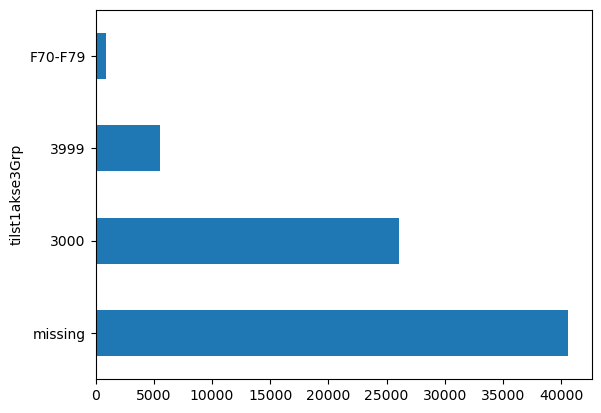

In [219]:
df = pd.merge(df_episode_t, df_icd10Kapittel, how='left', left_on=['tilst1akse3'], right_on=['KodeID'])
df['tilst1akse3Grp'] =  np.where(df['Niva1ID'].isnull(), df['tilst1akse3'], df['Niva1ID']) 
df_episode_t['tilst1akse3Grp']  = df[['tilst1akse3Grp']]#.apply(condense_category,min_freq=0.05, axis=0)
df_episode_t.tilst1akse3Grp.value_counts().plot(kind='barh')

In [220]:
#df_episode_t["tilst3akse1Grp"] = df_episode_t.tilst3akse1Grp.map(m)
#df_episode_t.tilst3akse1Grp.value_counts().plot(kind='barh')

/home/ihelse.net/adm_mounir/source/repos/dsc_hvikt_synthdata/notebooks/exploratory/functions.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  series = pd.value_counts(col)


<Axes: ylabel='tilst1akse4Grp'>

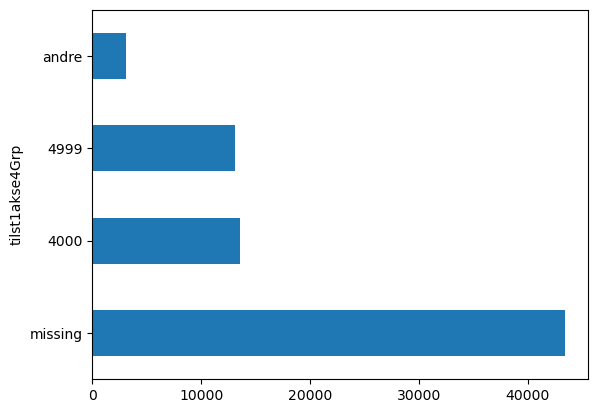

In [221]:
df = pd.merge(df_episode_t, df_icd10Kapittel, how='left', left_on=['tilst1akse4'], right_on=['KodeID'])
df['tilst1akse4Grp'] =  np.where(df['Niva1ID'].isnull(), df['tilst1akse4'], df['Niva1ID']) 
df_episode_t['tilst1akse4Grp']  = df[['tilst1akse4Grp']].apply(condense_category,min_freq=0.01, axis=0)
df_episode_t.tilst1akse4Grp.value_counts().plot(kind='barh')


In [222]:

df = pd.merge(df_episode_t, df_Akse5koder, how='left', left_on=['tilst1akse5'], right_on=['KodeID'])
df['tilst1akse5Grp'] =  np.where(df['Niva1ID'].isnull(), df['tilst1akse5'], df['Niva1ID']) 
df_episode_t['tilst1akse5Grp']  = df[['tilst1akse5Grp']].apply(condense_category,min_freq=0.001, axis=0)


/home/ihelse.net/adm_mounir/source/repos/dsc_hvikt_synthdata/notebooks/exploratory/functions.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  series = pd.value_counts(col)


<Axes: ylabel='tilst1akse5Grp'>

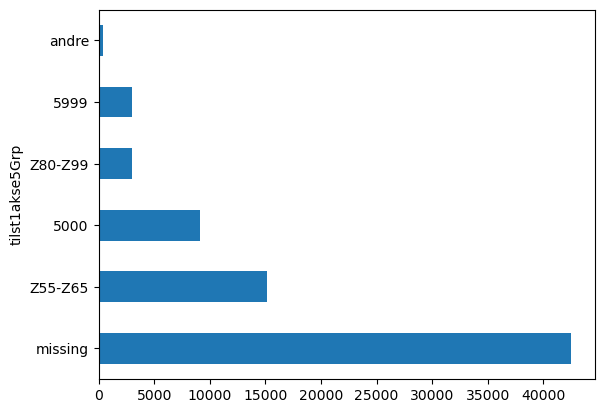

In [223]:

df_episode_t.tilst1akse5Grp.value_counts().plot(kind='barh')

In [224]:
#df = pd.merge(df_episode_t, df_icd10Kapittel, how='left', left_on=['tilst1akse6'], right_on=['KodeID'])
#df['tilst1akse6Grp'] =  np.where(df['Niva1ID'].isnull(), df['tilst1akse6'], df['Niva1ID']) 
df_episode_t['tilst1akse6']=df_episode_t['tilst1akse6'].replace('missing','6999')
df_episode_t['tilst1akse6'] = df_episode_t['tilst1akse6'].astype(int)
#df_episode_t['tilst1akse6Grp']  = df[['tilst1akse6Grp']]#.apply(condense_category,min_freq=0.01, axis=0)


/home/ihelse.net/adm_mounir/source/repos/dsc_hvikt_synthdata/notebooks/exploratory/functions.py:32: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  series = pd.value_counts(col)


<Axes: ylabel='tilst1akse6Grp'>

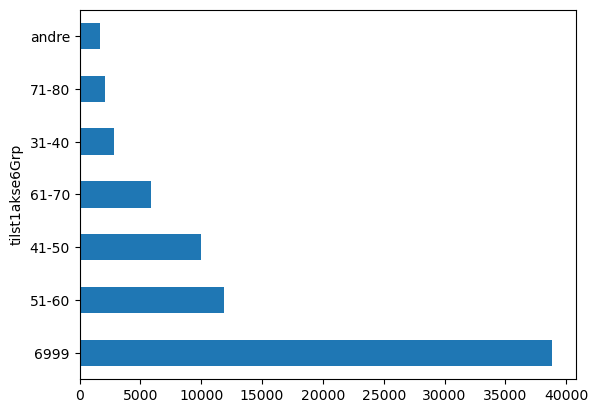

In [225]:

bins = [0,1,11,21,31, 41,51,61,71,81,91,101,6001,7001]
labels = ['0','1-10', '11-20', '21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','6000','6999']
df_episode_t['tilst1akse6Grp'] = pd.cut(df_episode_t.tilst1akse6, bins, labels = labels,include_lowest = True)
df_episode_t['tilst1akse6Grp']  = df_episode_t[['tilst1akse6Grp']].apply(condense_category,min_freq=0.01, axis=0)
df_episode_t.tilst1akse6Grp.value_counts().plot(kind='barh')

In [226]:
df_episode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   episode_order         73134 non-null  int64         
 1   henvisningsperiodeID  73134 non-null  int64         
 2   episodeID             73134 non-null  int64         
 3   innDatoTid            73134 non-null  datetime64[ns]
 4   utDatoTid             73134 non-null  datetime64[ns]
 5   ReshID_Avdeling       73134 non-null  object        
 6   ReshID_Seksjon        73134 non-null  object        
 7   kontaktType           73134 non-null  object        
 8   polUtforende          73134 non-null  object        
 9   spesialist            73134 non-null  object        
 10  rolle                 73134 non-null  object        
 11  tilst1akse1           73134 non-null  object        
 12  tilst2akse1           73134 non-null  object        
 13  tilst3akse1     

### Henvisningsperiode - Legg til Hoved Diagnose akse 1 til 5 føste og siste kontakt

In [227]:
sorted_df = df_episode_t[['henvisningsperiodeID','episode_order','tilst1akse1Grp']].sort_values(by=['henvisningsperiodeID','episode_order'], ascending=True)
g= sorted_df.groupby(['henvisningsperiodeID'])

In [228]:
## First
sorted_df = df_episode_t[['henvisningsperiodeID','episode_order','tilst1akse1Grp']].sort_values(by=['henvisningsperiodeID','episode_order'], ascending=True)
g= sorted_df.groupby(['henvisningsperiodeID'])

df = g.head(1)[['henvisningsperiodeID','tilst1akse1Grp']]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={'tilst1akse1Grp': 'tilst1akse1GrpFirst'}, inplace=True)

### Last
df = g.tail(1)[['henvisningsperiodeID','tilst1akse1Grp']]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={'tilst1akse1Grp': 'tilst1akse1GrpLast'}, inplace=True)
df_henvisningsperiode_t.head()

,pasientNr,henvisningsperiodeID,sluttDato,ansienDato,henvisnigsperiode_varighet,antall_kontakter,episode_varighet,tilst1akse1GrpFirst,tilst1akse1GrpLast
0,1001395,7386305,2016-06-07,2011-11-17,1664,3,20.0,1999,1999
1,1623992,7386308,2015-06-24,2011-11-25,1307,1,30.0,F90-F98,F90-F98
2,1582152,7386309,2018-01-04,2011-11-30,2227,1,60.0,F90-F98,F90-F98
3,1350364,7386314,2017-06-20,2011-12-08,2021,1,90.0,F90-F98,F90-F98
4,1791950,7386316,2015-01-28,2011-12-12,1143,1,20.0,F90-F98,F90-F98


In [229]:
## First
col = 'tilst1akse2Grp'
sorted_df = df_episode_t[['henvisningsperiodeID','episode_order',col]].sort_values(by=['henvisningsperiodeID','episode_order'], ascending=True)
g= sorted_df.groupby(['henvisningsperiodeID'])
df = g.head(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+ 'First'}, inplace=True)

### Last
df = g.tail(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+'Last'}, inplace=True)
df_henvisningsperiode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   pasientNr                   7730 non-null   int64         
 1   henvisningsperiodeID        7730 non-null   int64         
 2   sluttDato                   7730 non-null   datetime64[ns]
 3   ansienDato                  7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   episode_varighet            7730 non-null   float64       
 7   tilst1akse1GrpFirst         7730 non-null   object        
 8   tilst1akse1GrpLast          7730 non-null   object        
 9   tilst1akse2GrpFirst         7730 non-null   object        
 10  tilst1akse2GrpLast          7730 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
me

In [230]:
## First
col = 'tilst1akse3Grp'
sorted_df = df_episode_t[['henvisningsperiodeID','episode_order',col]].sort_values(by=['henvisningsperiodeID','episode_order'], ascending=True)
g= sorted_df.groupby(['henvisningsperiodeID'])
df = g.head(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+ 'First'}, inplace=True)

### Last
df = g.tail(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+'Last'}, inplace=True)
df_henvisningsperiode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   pasientNr                   7730 non-null   int64         
 1   henvisningsperiodeID        7730 non-null   int64         
 2   sluttDato                   7730 non-null   datetime64[ns]
 3   ansienDato                  7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   episode_varighet            7730 non-null   float64       
 7   tilst1akse1GrpFirst         7730 non-null   object        
 8   tilst1akse1GrpLast          7730 non-null   object        
 9   tilst1akse2GrpFirst         7730 non-null   object        
 10  tilst1akse2GrpLast          7730 non-null   object        
 11  tilst1akse3GrpFirst         7730 non-null   object      

In [231]:
## First
col = 'tilst1akse4Grp'
sorted_df = df_episode_t[['henvisningsperiodeID','episode_order',col]].sort_values(by=['henvisningsperiodeID','episode_order'], ascending=True)
g= sorted_df.groupby(['henvisningsperiodeID'])
df = g.head(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+ 'First'}, inplace=True)

### Last
df = g.tail(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+'Last'}, inplace=True)
df_henvisningsperiode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   pasientNr                   7730 non-null   int64         
 1   henvisningsperiodeID        7730 non-null   int64         
 2   sluttDato                   7730 non-null   datetime64[ns]
 3   ansienDato                  7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   episode_varighet            7730 non-null   float64       
 7   tilst1akse1GrpFirst         7730 non-null   object        
 8   tilst1akse1GrpLast          7730 non-null   object        
 9   tilst1akse2GrpFirst         7730 non-null   object        
 10  tilst1akse2GrpLast          7730 non-null   object        
 11  tilst1akse3GrpFirst         7730 non-null   object      

In [232]:
## First
col = 'tilst1akse5Grp'
sorted_df = df_episode_t[['henvisningsperiodeID','episode_order',col]].sort_values(by=['henvisningsperiodeID','episode_order'], ascending=True)
g= sorted_df.groupby(['henvisningsperiodeID'])
df = g.head(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+ 'First'}, inplace=True)

### Last
df = g.tail(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+'Last'}, inplace=True)
df_henvisningsperiode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   pasientNr                   7730 non-null   int64         
 1   henvisningsperiodeID        7730 non-null   int64         
 2   sluttDato                   7730 non-null   datetime64[ns]
 3   ansienDato                  7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   episode_varighet            7730 non-null   float64       
 7   tilst1akse1GrpFirst         7730 non-null   object        
 8   tilst1akse1GrpLast          7730 non-null   object        
 9   tilst1akse2GrpFirst         7730 non-null   object        
 10  tilst1akse2GrpLast          7730 non-null   object        
 11  tilst1akse3GrpFirst         7730 non-null   object      

In [233]:
## First
col = 'tilst1akse6Grp'
sorted_df = df_episode_t[['henvisningsperiodeID','episode_order',col]].sort_values(by=['henvisningsperiodeID','episode_order'], ascending=True)
g= sorted_df.groupby(['henvisningsperiodeID'])
df = g.head(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+ 'First'}, inplace=True)

### Last
df = g.tail(1)[['henvisningsperiodeID',col]]
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df, how='left',on=['henvisningsperiodeID'])

df_henvisningsperiode_t.rename(columns={col: col+'Last'}, inplace=True)
df_henvisningsperiode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   pasientNr                   7730 non-null   int64         
 1   henvisningsperiodeID        7730 non-null   int64         
 2   sluttDato                   7730 non-null   datetime64[ns]
 3   ansienDato                  7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   episode_varighet            7730 non-null   float64       
 7   tilst1akse1GrpFirst         7730 non-null   object        
 8   tilst1akse1GrpLast          7730 non-null   object        
 9   tilst1akse2GrpFirst         7730 non-null   object        
 10  tilst1akse2GrpLast          7730 non-null   object        
 11  tilst1akse3GrpFirst         7730 non-null   object      

### Add Polutførende

In [234]:
df_episode_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   episode_order         73134 non-null  int64         
 1   henvisningsperiodeID  73134 non-null  int64         
 2   episodeID             73134 non-null  int64         
 3   innDatoTid            73134 non-null  datetime64[ns]
 4   utDatoTid             73134 non-null  datetime64[ns]
 5   ReshID_Avdeling       73134 non-null  object        
 6   ReshID_Seksjon        73134 non-null  object        
 7   kontaktType           73134 non-null  object        
 8   polUtforende          73134 non-null  object        
 9   spesialist            73134 non-null  object        
 10  rolle                 73134 non-null  object        
 11  tilst1akse1           73134 non-null  object        
 12  tilst2akse1           73134 non-null  object        
 13  tilst3akse1     

In [235]:
df = pd.get_dummies(df_episode_t, columns=['polUtforendeGrp'])

In [236]:
df.columns

Index(['episode_order', 'henvisningsperiodeID', 'episodeID', 'innDatoTid',
       'utDatoTid', 'ReshID_Avdeling', 'ReshID_Seksjon', 'kontaktType',
       'polUtforende', 'spesialist', 'rolle', 'tilst1akse1', 'tilst2akse1',
       'tilst3akse1', 'tilst4akse1', 'tilst5akse1', 'tilst6akse1',
       'tilst1akse2', 'tilst2akse2', 'tilst3akse2', 'tilst4akse2',
       'tilst5akse2', 'tilst6akse2', 'tilst1akse3', 'tilst2akse3',
       'tilst3akse3', 'tilst4akse3', 'tilst5akse3', 'tilst6akse3',
       'tilst1akse4', 'tilst2akse4', 'tilst3akse4', 'tilst4akse4',
       'tilst5akse4', 'tilst6akse4', 'tilst1akse5', 'tilst2akse5',
       'tilst3akse5', 'tilst4akse5', 'tilst5akse5', 'tilst6akse5',
       'tilst1akse6', 'tilst2akse6', 'tilst3akse6', 'tilst4akse6',
       'tilst5akse6', 'tilst6akse6', 'episode_varighet', 'rolleGrp',
       'kontaktTypeGrp', 'tilst1akse1Grp', 'tilst1akse2Grp', 'tilst1akse3Grp',
       'tilst1akse4Grp', 'tilst1akse5Grp', 'tilst1akse6Grp',
       'polUtforendeGrp_Annet_he

In [237]:
df_henvisninger_res =df.groupby(['henvisningsperiodeID']).agg({
#'kontaktTypeGrp_Direkte_pasientkontakt':'sum'
#,'kontaktTypeGrp_Indirekte_pasientkontakt':'sum'
'polUtforendeGrp_Lege':'sum'
,'polUtforendeGrp_Annet_helsepersonell':'sum'                                        
                                    
,'polUtforendeGrp_Psykolog':'sum'                                         
,'polUtforendeGrp_Sosionom':'sum'                                     
,'polUtforendeGrp_Annet_helsepersonell':'sum' 
    ,'polUtforendeGrp_Annet_helsepersonell':'sum'  
,'polUtforendeGrp_Annet_helsepersonell':'sum'  
,'polUtforendeGrp_Annet_helsepersonell':'sum'  

#,'rolle_Ansvarlig':'sum'                                         
#,'rolle_kontakt':'sum'                                         
                                         
                                         
                                         
                                         })

In [238]:
df_henvisninger_res.head()

,polUtforendeGrp_Lege,polUtforendeGrp_Annet_helsepersonell,polUtforendeGrp_Psykolog,polUtforendeGrp_Sosionom
henvisningsperiodeID,,,,
7386305,0,3,0,0
7386308,0,0,0,1
7386309,0,0,1,0
7386314,0,0,1,0
7386316,0,1,0,0


In [239]:
df_henvisningsperiode_t = pd.merge(df_henvisningsperiode_t, df_henvisninger_res, how='left',on=['henvisningsperiodeID'])
df_henvisningsperiode_t.head()

,pasientNr,henvisningsperiodeID,sluttDato,ansienDato,henvisnigsperiode_varighet,antall_kontakter,episode_varighet,tilst1akse1GrpFirst,tilst1akse1GrpLast,tilst1akse2GrpFirst,tilst1akse2GrpLast,tilst1akse3GrpFirst,tilst1akse3GrpLast,tilst1akse4GrpFirst,tilst1akse4GrpLast,tilst1akse5GrpFirst,tilst1akse5GrpLast,tilst1akse6GrpFirst,tilst1akse6GrpLast,polUtforendeGrp_Lege,polUtforendeGrp_Annet_helsepersonell,polUtforendeGrp_Psykolog,polUtforendeGrp_Sosionom
0,1001395,7386305,2016-06-07,2011-11-17,1664,3,20.0,1999,1999,F80-F89,F80-F89,missing,missing,missing,missing,missing,missing,6999,51-60,0,3,0,0
1,1623992,7386308,2015-06-24,2011-11-25,1307,1,30.0,F90-F98,F90-F98,2999,2999,3999,3999,andre,andre,Z55-Z65,Z55-Z65,51-60,51-60,0,0,0,1
2,1582152,7386309,2018-01-04,2011-11-30,2227,1,60.0,F90-F98,F90-F98,F80-F89,F80-F89,F70-F79,F70-F79,missing,missing,Z55-Z65,Z55-Z65,41-50,41-50,0,0,1,0
3,1350364,7386314,2017-06-20,2011-12-08,2021,1,90.0,F90-F98,F90-F98,missing,missing,missing,missing,missing,missing,missing,missing,6999,6999,0,0,1,0
4,1791950,7386316,2015-01-28,2011-12-12,1143,1,20.0,F90-F98,F90-F98,2999,2999,3000,3000,4000,4000,Z55-Z65,Z55-Z65,51-60,51-60,0,1,0,0


### Generate week. month and year from date

In [240]:
#df_episode_t['innDatoTid'] = pd.to_datetime(df_episode_t['utDatoTid']).dt.date
#df_episode_t['innDatoTid'] = pd.to_datetime(df_episode_t['utDatoTid']).dt.normalize()


#df_episode_t['utDatoTid'] = pd.to_datetime(df_episode_t['utDatoTid']).dt.date
#df_episode_t['utDatoTid'] = pd.to_datetime(df_episode_t['utDatoTid']).dt.normalize()

In [241]:

#df_henvisningsperiode_t['ansienDato'] = pd.to_datetime(df_henvisningsperiode_t['ansienDato']).dt.date
#df_henvisningsperiode_t['ansienDato'] = pd.to_datetime(df_henvisningsperiode_t['ansienDato']).dt.normalize()

#df_henvisningsperiode_t['sluttDato'] = pd.to_datetime(df_henvisningsperiode_t['sluttDato']).dt.date
#df_henvisningsperiode_t['sluttDato'] = pd.to_datetime(df_henvisningsperiode_t['sluttDato']).dt.normalize()

In [242]:
#df_henvisningsperiode_t['ansienDato_aar'] = pd.to_datetime(df_henvisningsperiode_t['ansienDato']).dt.to_period('Y').astype(int)
#df_henvisningsperiode_t['ansienDato_maaned'] = pd.to_datetime(df_henvisningsperiode_t['ansienDato']).dt.to_period('M').astype(int)
#df_henvisningsperiode_t['ansienDato_uka'] = pd.to_datetime(df_henvisningsperiode_t['ansienDato']).dt.to_period('W').astype(int)

#df_henvisningsperiode_t['sluttDato_aar'] = pd.to_datetime(df_henvisningsperiode_t['sluttDato']).dt.to_period('Y').astype(int)
#df_henvisningsperiode_t['sluttDato_maaned'] = pd.to_datetime(df_henvisningsperiode_t['sluttDato']).dt.to_period('M').astype(int)
#df_henvisningsperiode_t['sluttDato_uka'] = pd.to_datetime(df_henvisningsperiode_t['sluttDato']).dt.to_period('W').astype(int)

### group age

<Axes: xlabel='alderGrp'>

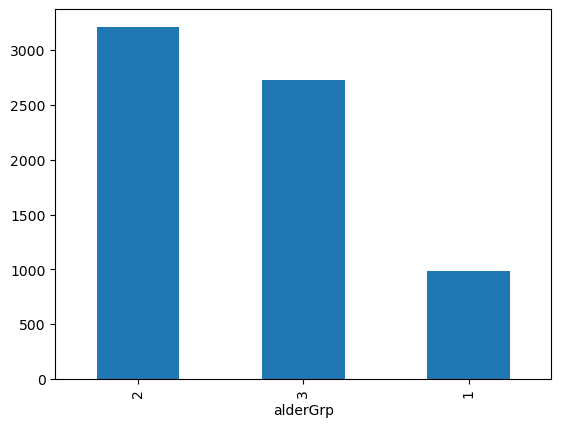

In [243]:
bins = [0,13,20,100 ]
labels = ['0-12','13-19', '20+']
df_pasient_t['alderGrpDesc'] = pd.cut(df_pasient_t.alder, bins, labels = labels,include_lowest = True)
labels = ['1','2', '3']
df_pasient_t['alderGrp'] = pd.cut(df_pasient_t.alder, bins, labels = labels,include_lowest = True)
df_pasient_t['alderGrp'].value_counts().plot(kind='bar')
#df_henvisningsperiode_t["alderGrp"] = df_henvisningsperiode_t.alder

<Axes: xlabel='alderGrp'>

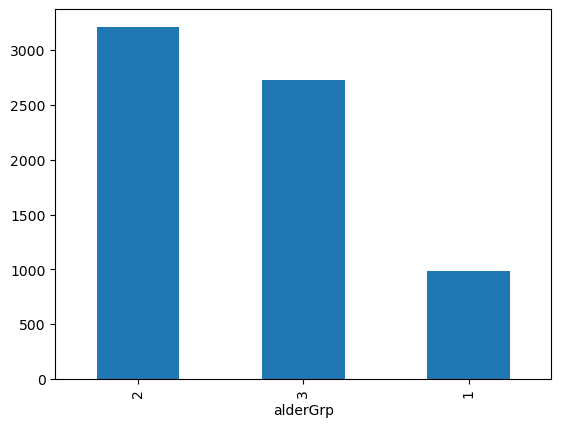

In [244]:
df_pasient_t.alderGrp.value_counts().plot(kind='bar')

In [245]:
df_pasient_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924 entries, 0 to 6923
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pasientNr     6924 non-null   int64   
 1   alder         6924 non-null   int64   
 2   kjonn         6924 non-null   object  
 3   alderGrpDesc  6924 non-null   category
 4   alderGrp      6924 non-null   category
dtypes: category(2), int64(2), object(1)
memory usage: 176.2+ KB


### replace Ids and export data Data

In [246]:
df_episode_exp = df_episode_t.copy()
df_henvisningsperiode_exp =df_henvisningsperiode_t.copy()
df_pasient_exp=df_pasient_t.copy()

### Insert Faker Ids

In [247]:
from faker import Faker
faker = Faker()
Faker.seed(1)

dict_Ids = {Id: faker.unique.random_int(min= 0, max= 999999) for Id in df_pasient_exp['pasientNr'].unique()}
df_pasient_exp['pasientNr_faker'] = df_pasient_exp['pasientNr'].map(dict_Ids)
df_henvisningsperiode_exp['pasientNr_faker'] = df_henvisningsperiode_exp['pasientNr'].map(dict_Ids)

#df['pasientNr_faker']=df['pasientNr_faker'].astype('category')
num_values = len(set(dict_Ids.values()))
num_values


6924

In [248]:
df_henvisningsperiode_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   pasientNr                             7730 non-null   int64         
 1   henvisningsperiodeID                  7730 non-null   int64         
 2   sluttDato                             7730 non-null   datetime64[ns]
 3   ansienDato                            7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet            7730 non-null   int64         
 5   antall_kontakter                      7730 non-null   int64         
 6   episode_varighet                      7730 non-null   float64       
 7   tilst1akse1GrpFirst                   7730 non-null   object        
 8   tilst1akse1GrpLast                    7730 non-null   object        
 9   tilst1akse2GrpFirst                   7730 non-null   object        
 10  

In [249]:
 df_henvisningsperiode_exp['pasientNr_faker'].isnull().values.any()

False

In [250]:

dict_Ids = {Id: faker.unique.random_int(min= 0, max= 999999) for Id in df_henvisningsperiode_exp['henvisningsperiodeID'].unique()}
df_henvisningsperiode_exp['henvisningsperiodeID_faker'] = df_henvisningsperiode_exp['henvisningsperiodeID'].map(dict_Ids)
df_episode_exp['henvisningsperiodeID_faker'] = df_episode_exp['henvisningsperiodeID'].map(dict_Ids)
num_values = len(set(dict_Ids.values()))
num_values

7730

In [251]:
len(df_henvisningsperiode_exp['henvisningsperiodeID'].unique())

7730

In [252]:
len(df_episode_exp['henvisningsperiodeID'].unique())

7730

In [253]:
dict_Ids = {Id: faker.unique.random_int(min= 0, max= 999999) for Id in df_episode_exp['episodeID'].unique()}
df_episode_exp['episodeID_faker'] = df_episode_exp['episodeID'].map(dict_Ids)
num_values = len(set(dict_Ids.values()))
num_values

73134

In [254]:
df_episode_exp[df_episode_exp['henvisningsperiodeID_faker'].isnull()].henvisningsperiodeID.unique().tolist()

[]

In [255]:
df_episode_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   episode_order               73134 non-null  int64         
 1   henvisningsperiodeID        73134 non-null  int64         
 2   episodeID                   73134 non-null  int64         
 3   innDatoTid                  73134 non-null  datetime64[ns]
 4   utDatoTid                   73134 non-null  datetime64[ns]
 5   ReshID_Avdeling             73134 non-null  object        
 6   ReshID_Seksjon              73134 non-null  object        
 7   kontaktType                 73134 non-null  object        
 8   polUtforende                73134 non-null  object        
 9   spesialist                  73134 non-null  object        
 10  rolle                       73134 non-null  object        
 11  tilst1akse1                 73134 non-null  object    

### Export to csv

In [256]:

df_episode_exp.head()

,episode_order,henvisningsperiodeID,episodeID,innDatoTid,utDatoTid,ReshID_Avdeling,ReshID_Seksjon,kontaktType,polUtforende,spesialist,rolle,tilst1akse1,tilst2akse1,tilst3akse1,tilst4akse1,tilst5akse1,tilst6akse1,tilst1akse2,tilst2akse2,tilst3akse2,tilst4akse2,tilst5akse2,tilst6akse2,tilst1akse3,tilst2akse3,tilst3akse3,tilst4akse3,tilst5akse3,tilst6akse3,tilst1akse4,tilst2akse4,tilst3akse4,tilst4akse4,tilst5akse4,tilst6akse4,tilst1akse5,tilst2akse5,tilst3akse5,tilst4akse5,tilst5akse5,tilst6akse5,tilst1akse6,tilst2akse6,tilst3akse6,tilst4akse6,tilst5akse6,tilst6akse6,episode_varighet,rolleGrp,polUtforendeGrp,kontaktTypeGrp,tilst1akse1Grp,tilst1akse2Grp,tilst1akse3Grp,tilst1akse4Grp,tilst1akse5Grp,tilst1akse6Grp,henvisningsperiodeID_faker,episodeID_faker
0,3,7386582,44491252,2015-04-16 11:00:00,2015-04-16 11:15:00,106917,107010,5,5,Nei,2,F900,1999,F951,missing,missing,missing,2000,missing,missing,missing,missing,missing,3000,missing,missing,missing,missing,missing,4999,missing,missing,missing,missing,missing,5.1,missing,missing,missing,missing,missing,78,missing,missing,missing,missing,missing,15,kontakt,Annet_helsepersonell,Indirekte_pasientkontakt,F90-F98,2000,3000,4999,Z55-Z65,71-80,905040,401317
1,1,7386587,33158522,2015-01-16 08:15:00,2015-01-16 09:15:00,106917,107005,2,9,Ja,1,F4325,Z004,missing,missing,missing,missing,2000,missing,missing,missing,missing,missing,3000,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1.1,8.8,missing,missing,missing,missing,6999,missing,missing,missing,missing,missing,60,Ansvarlig,Sosionom,Behandling,F40-F48,2000,3000,missing,Z55-Z65,6999,408626,178135
2,2,7386587,33171906,2015-01-16 09:15:00,2015-01-16 09:30:00,106917,107005,2,4,Nei,2,F4325,Z004,missing,missing,missing,missing,2000,missing,missing,missing,missing,missing,3000,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1.1,8.8,missing,missing,missing,missing,6999,missing,missing,missing,missing,missing,15,kontakt,Psykolog,Behandling,F40-F48,2000,3000,missing,Z55-Z65,6999,408626,594274
3,3,7386587,33249432,2015-01-23 08:15:00,2015-01-23 09:00:00,106917,107005,2,4,Nei,2,F4325,Z004,missing,missing,missing,missing,2000,missing,missing,missing,missing,missing,3000,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1.1,8.8,missing,missing,missing,missing,6999,missing,missing,missing,missing,missing,45,kontakt,Psykolog,Behandling,F40-F48,2000,3000,missing,Z55-Z65,6999,408626,787619
4,4,7386587,33252236,2015-01-23 09:15:00,2015-01-23 09:30:00,106917,107005,2,4,Nei,2,F4325,Z004,missing,missing,missing,missing,2000,missing,missing,missing,missing,missing,3000,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,1.1,8.8,missing,missing,missing,missing,6999,missing,missing,missing,missing,missing,15,kontakt,Psykolog,Behandling,F40-F48,2000,3000,missing,Z55-Z65,6999,408626,681936


In [259]:
features =['pasientNr_faker','alderGrp','alderGrpDesc','kjonn','alder']
df_pasient_exp[features].to_csv("../../data/processed/pasient_transformed.csv", sep='\t', encoding='utf-8',index=False) 

df_pasient_exp[features].rename(columns={"pasientNr_faker": "patientNr", "alderGrp": "ageGrp","alder":"age","alderGrpDesc": "ageGrpDesc","kjonn":"sex"}).to_csv("../../data/processed/patients_transformed.csv", sep='\t', encoding='utf-8',index=False) 

df_pasient_exp[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924 entries, 0 to 6923
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pasientNr_faker  6924 non-null   int64   
 1   alderGrp         6924 non-null   category
 2   alderGrpDesc     6924 non-null   category
 3   kjonn            6924 non-null   object  
 4   alder            6924 non-null   int64   
dtypes: category(2), int64(2), object(1)
memory usage: 176.2+ KB


In [175]:
paslist = df_pasient_exp.pasientNr.unique().tolist()
len(paslist)

6924

remove referals with referlLenghth =0

In [176]:
#df_henvisningsperiode_exp = df_henvisningsperiode_exp[df_henvisningsperiode_exp['henvisnigsperiode_varighet']  > 0]

In [177]:
df_henvisningsperiode_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   pasientNr                             7730 non-null   int64         
 1   henvisningsperiodeID                  7730 non-null   int64         
 2   sluttDato                             7730 non-null   datetime64[ns]
 3   ansienDato                            7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet            7730 non-null   int64         
 5   antall_kontakter                      7730 non-null   int64         
 6   episode_varighet                      7730 non-null   float64       
 7   tilst1akse1GrpFirst                   7730 non-null   object        
 8   tilst1akse1GrpLast                    7730 non-null   object        
 9   tilst1akse2GrpFirst                   7730 non-null   object        
 10  

In [178]:
features =['henvisningsperiodeID_faker'  ,'pasientNr_faker'
          ,'ansienDato','sluttDato','henvisnigsperiode_varighet','antall_kontakter'
               , 'tilst1akse1GrpLast','tilst1akse1GrpFirst'
#, 'henvFraInstitusjonID'
          ]


dict = {"henvisningsperiodeID_faker": "referralID", 
     "pasientNr_faker": "patientNr", 
       "ansienDato":"referralStartDate",
        "sluttDato":"referralEndDate",
        "henvisnigsperiode_varighet":"referralLength",
        "antall_kontakter": "numOfStays",
        "tilst1akse1GrpLast":"cond1axis1GrpLast",
        "tilst1akse1GrpFirst":"cond1axis1GrpFirst"
       }
       
       
df_henvisningsperiode_exp[features].to_csv("../../data/processed/henvisningsperiode_transformed.csv", sep='\t',index=False)
df_henvisningsperiode_exp[features].rename(columns=dict).to_csv("../../data/processed/referrals_transformed.csv", sep='\t',index=False)
df_henvisningsperiode_exp[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7730 entries, 0 to 7729
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   henvisningsperiodeID_faker  7730 non-null   int64         
 1   pasientNr_faker             7730 non-null   int64         
 2   ansienDato                  7730 non-null   datetime64[ns]
 3   sluttDato                   7730 non-null   datetime64[ns]
 4   henvisnigsperiode_varighet  7730 non-null   int64         
 5   antall_kontakter            7730 non-null   int64         
 6   tilst1akse1GrpLast          7730 non-null   object        
 7   tilst1akse1GrpFirst         7730 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 483.2+ KB


In [179]:
features =['henvisningsperiodeID_faker', 'episodeID_faker', 'episode_order','innDatoTid','utDatoTid',
       'episode_varighet', 
       'polUtforendeGrp',  'kontaktTypeGrp','spesialist',
       'rolleGrp','tilst1akse1Grp','tilst1akse2Grp','tilst1akse3Grp','tilst1akse4Grp','tilst1akse5Grp',
           'tilst1akse6Grp'
]


dict = {"henvisningsperiodeID_faker": "referralID", 
        "episodeID_faker": "stayID",
        "episode_order":"stayOrder",
        "innDatoTid":"stayStartDate",
        "utDatoTid":"stayEndDate",
       "episode_varighet":"stayLength",
        "polUtforendeGrp":"personnelGrp",
        "kontaktTypeGrp":"stayTypeGrp",
      "spesialist":"specialist",
        "rolleGrp":"roleGrp",
        "tilst1akse1Grp":"cond1axis1Grp",
        "tilst1akse2Grp":"cond1axis2Grp",
        "tilst1akse3Grp":"cond1axis3Grp",
        "tilst1akse4Grp":"cond1axis4Grp",
        "tilst1akse5Grp":"cond1axis5Grp",
        "tilst1akse6Grp":"cond1axis6Grp"
       }

df_episode_exp[features].to_csv("../../data/episode_transformed.csv", sep='\t',index=False)
df_episode_exp[features].rename(columns=dict).to_csv("../../data/processed/stays_transformed.csv", sep='\t',index=False)
df_episode_exp[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73134 entries, 0 to 73133
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   henvisningsperiodeID_faker  73134 non-null  int64         
 1   episodeID_faker             73134 non-null  int64         
 2   episode_order               73134 non-null  int64         
 3   innDatoTid                  73134 non-null  datetime64[ns]
 4   utDatoTid                   73134 non-null  datetime64[ns]
 5   episode_varighet            73134 non-null  int64         
 6   polUtforendeGrp             73134 non-null  object        
 7   kontaktTypeGrp              73134 non-null  object        
 8   spesialist                  73134 non-null  object        
 9   rolleGrp                    73134 non-null  object        
 10  tilst1akse1Grp              73134 non-null  object        
 11  tilst1akse2Grp              73134 non-null  object    